In [47]:
import numpy as np
import os
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

# Loading MNIST Dataset

(60000, 28, 28)


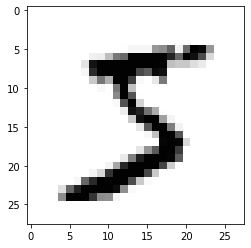

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)

plt.imshow(x_train[0], cmap='Greys')

# Image Pre-processing

1. Reshapping images to set number of channels (1 for grayscale)
2. Normalizing input data
3. Turning true values to one-hot encoding

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28, 1)
(60000, 10)


# Building Model

In [4]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

2021-12-30 05:36:58.805862: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-30 05:36:58.806113: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-30 05:36:58.806157: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-R08OIG9): /proc/driver/nvidia/version does not exist
2021-12-30 05:36:58.807366: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Fitting Model

In [6]:
result = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2)

Epoch 1/15
750/750 [==============================] - 9s 12ms/step - loss: 0.0174 - accuracy: 0.9940 - val_loss: 0.0376 - val_accuracy: 0.9922
Epoch 2/15
750/750 [==============================] - 9s 12ms/step - loss: 0.0159 - accuracy: 0.9948 - val_loss: 0.0449 - val_accuracy: 0.9902
Epoch 3/15
750/750 [==============================] - 9s 12ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.0421 - val_accuracy: 0.9914
Epoch 4/15
750/750 [==============================] - 9s 13ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0433 - val_accuracy: 0.9913
Epoch 5/15
750/750 [==============================] - 10s 13ms/step - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.0464 - val_accuracy: 0.9906
Epoch 6/15
750/750 [==============================] - 9s 12ms/step - loss: 0.0130 - accuracy: 0.9955 - val_loss: 0.0418 - val_accuracy: 0.9920
Epoch 7/15
750/750 [==============================] - 9s 13ms/step - loss: 0.0109 - accuracy: 0.9962 - val_loss: 0.0440 - val_accuracy: 0.991

# Loss Results Visualized

(1.0, 15.0)

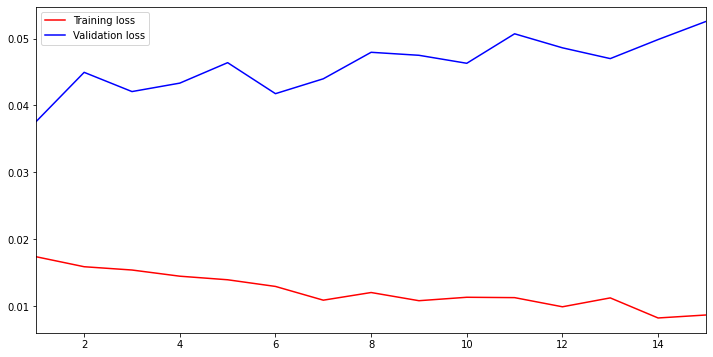

In [27]:
plt.figure(figsize=(12,6))
plt.plot(range(1,16), result.history['loss'], 'r-', range(1,16), result.history['val_loss'], 'b-')
plt.legend(['Training loss', 'Validation loss'])
plt.xlim([1,15])

# Accuracy Results Visualized

(1.0, 15.0)

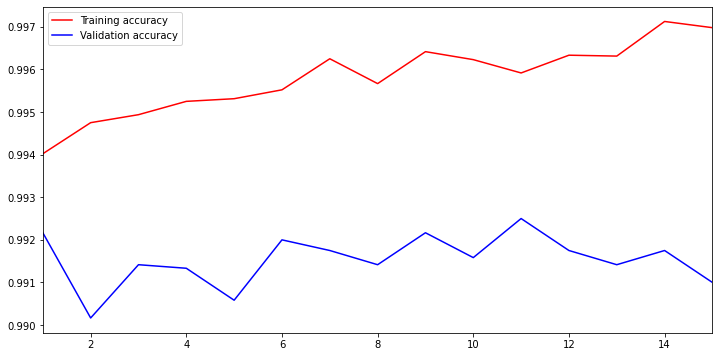

In [28]:
plt.figure(figsize=(12,6))
plt.plot(range(1,16), result.history['accuracy'], 'r-', range(1,16), result.history['val_accuracy'], 'b-')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.xlim([1,15])

# Evaluation Results

In [29]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=64)
print(f'Test loss: {test_loss} Accuracy: {test_accuracy}')

157/157 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9923
Test loss: 0.03841249644756317 Accuracy: 0.9922999739646912


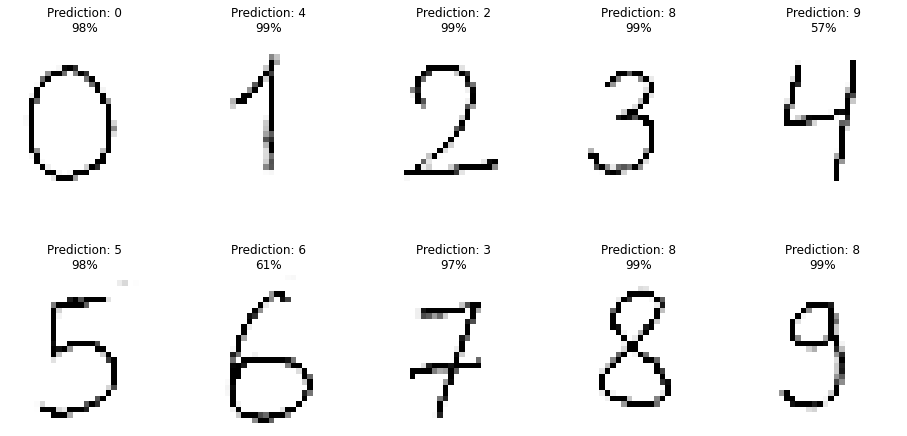

In [136]:
fig = plt.figure(figsize=(16,8))

image_folder = './Data'
for i, image in enumerate(os.listdir(image_folder)):
    image_file_name = os.path.join(image_folder, image)
    img = Image.open(image_file_name).resize((28,28)).convert('L').rotate(90)
    sharpness = ImageEnhance.Sharpness(img)
    img = sharpness.enhance(4)
    contrast = ImageEnhance.Contrast(img)
    img = contrast.enhance(2)
    img2array = np.array(img)
    img2array = img2array.reshape(1,28,28,1)
    img2array = img2array.astype('float32') / 255.0
    
    pred = model.predict([img2array])[0]
    max_val = pred.max()
    index = np.where(pred == max_val)
    
    fig.add_subplot(2, 5, i+1)
    plt.axis('off')
    plt.title(f'Prediction: {int(index[0])}\n{int(max_val*100)}%')
    plt.imshow(img, cmap='Greys_r')